In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [143]:
data = pd.read_csv('Desktop/hpd.csv')

date = pd.to_datetime(data.Date)#, format='%y/%m/%d')

data= data[data['Product_Code'].str.contains("Product_1159")]
index = pd.DatetimeIndex(data.Date)
ser = pd.Series(data.Order_Demand, dtype='float64')
print("Date: ",data.Date.dtype)
print("index: ", index.dtype)

Date:  object
index:  datetime64[ns]


In [ ]:
#In the cell above, I load in the data, and convert it to datetime in order to be able to plot the data; however, 
#as you can see, the source of my nightmares has been this conversion did not f@#$%^&* work. it is still an object 
#type. I solved this by loading it into a new DateTimeINdex "index," which is the proper type I need

#similarly, Order_Demand was ALSO of object type, which made it ungraphable. I made another temporary to convert
#it to float64

#Instead of dropping all uneccessary columns, the same result can be achieved from creating a new dataframe with 
#a copy of the desired columns; see below.

#an idea on how to feature engineering would help the data set establish additional value is to analysize the actual
# demand over the time period 2012-2016, but also seeing the mean value for the product as well. 

In [153]:
new = pd.DataFrame(zip(index, ser))

new=new.rename(columns={0: "Date", 1: "Demand"})
new = new.set_index('Date')

new['Year'] = new.index.year
new['Month'] = new.index.month
new['Day'] = new.index.day
print(new)

              Demand  Year  Month  Day
Date                                  
2012-01-06   50000.0  2012      1    6
2012-01-18  100000.0  2012      1   18
2012-02-02   50000.0  2012      2    2
2012-02-22   50000.0  2012      2   22
2012-03-02   50000.0  2012      3    2
...              ...   ...    ...  ...
2016-10-25   10000.0  2016     10   25
2016-11-18   60000.0  2016     11   18
2016-11-30   60000.0  2016     11   30
2016-11-25   10000.0  2016     11   25
2016-06-27   10000.0  2016      6   27

[349 rows x 4 columns]


In [ ]:
#In the cell above, i made a "new" Data frame, in which I copy the date and Order_demand. The columns were labeled
#0 and 1 so I renamed them accordingly 

#I utlized parsing the data because I figured it would be necessary, but I didnt end up using it because of how nice
#the datetime type was 

Text(0.5, 1.0, 'Product 1159 Demand, 2012-2016')

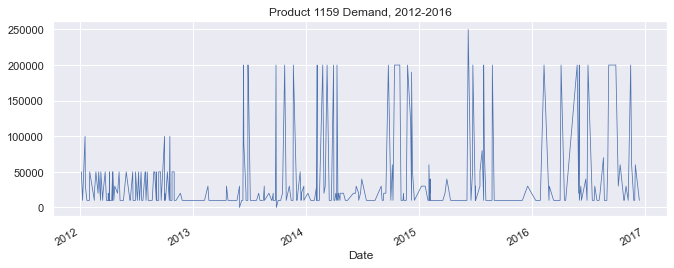

In [128]:
sns.set(rc={'figure.figsize':(11, 4)})
new['Demand'].plot(linewidth=0.75,label='Overal Demand');
plt.title('Product 1159 Demand, 2012-2016')

In [ ]:
#in the cell above, I used seaborn to nicely graph the demands over the time periods 2012-2016 ♥
#I dont wish to end it here, I want to see the average, using the mean
#I tried using .rolling() at first, but resampling with the month was the method that worked for me; see below

Text(0.5, 1.0, 'Average Product 1159 Demand, 2012-2016')

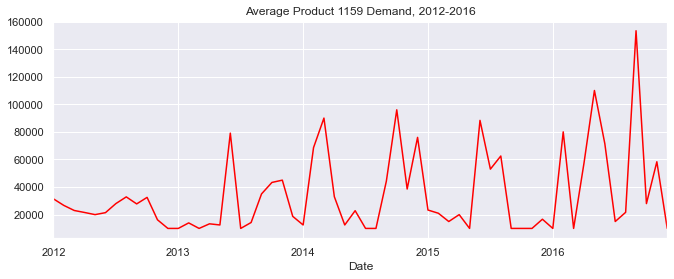

In [131]:
#making the mean 
D_mean = new["Demand"].resample('M').mean()
D_mean.plot(linewidth=1.5,label='Demand Average', color='red')
plt.title('Average Product 1159 Demand, 2012-2016')

In [ ]:
#combining the two graphs, we get a nice forecasting model for the mysterious Product 1159. The low trends 
#occur in 2013, whereas the peak of product demand is mid-2015; see below

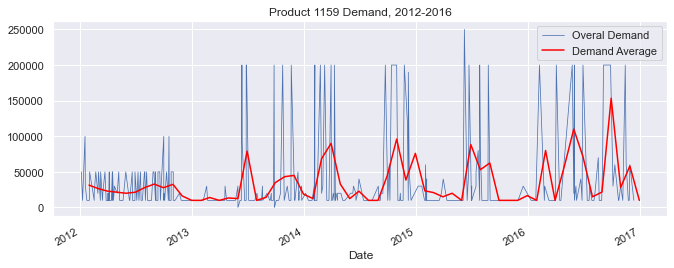

In [135]:
#combining total and mean 
sns.set(rc={'figure.figsize':(11, 4)})
new['Demand'].plot(linewidth=0.75,label='Overal Demand');
plt.title('Product 1159 Demand, 2012-2016')

D_mean = new["Demand"].resample('M').mean()
D_mean.plot(linewidth=1.5,label='Demand Average', color='red')

plt.legend()

In [157]:
print("max demand: ",new.Demand.max())
print("min demand: ",new.Demand.min())

max demand:  250000.0
min demand:  0.0


In [ ]:
#I want to see the local min and max of the graphs

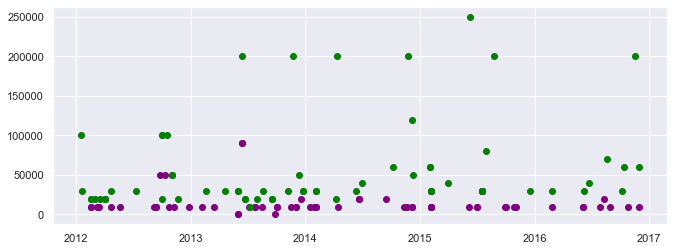

In [165]:
new['min'] = new.Demand[(new.Demand.shift(1) >= new.Demand) & (new.Demand.shift(-1) > new.Demand)]
new['max'] = new.Demand[(new.Demand.shift(1) <= new.Demand) & (new.Demand.shift(-1) < new.Demand)]
plt.scatter(new.index, new['min'], c='purple')
plt.scatter(new.index, new['max'], c='green')

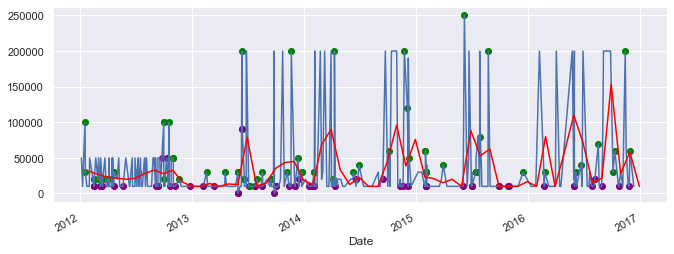

In [166]:
#Combinging even more :D
plt.scatter(new.index, new['min'], c='purple')
plt.scatter(new.index, new['max'], c='green')
new.Demand.plot()
D_mean.plot(linewidth=1.5,label='Demand Average', color='red')

In [ ]:
#Results:
#the forecasting model shows the actual fluctuation of the demands, as well as the average, and local mininums
#and maximums for product 1159